In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [26]:
import pandas as pd

df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.shape)
df.head()


(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning & Preprocessing

In [28]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [29]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [30]:
df = df.dropna(subset=['TotalCharges'])

df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
df.reset_index(drop=True, inplace=True)


# Churn Rate Overview

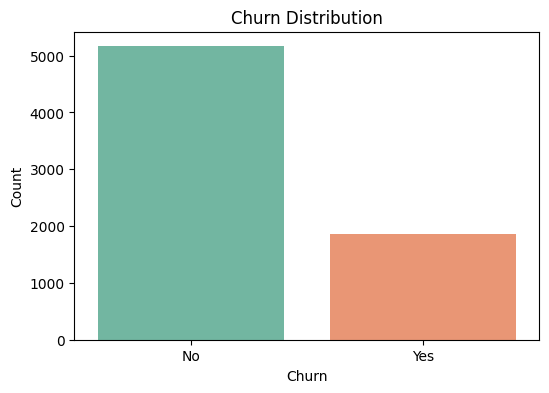

Churn Rate: 26.58%


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

churn_percentage = churn_counts['Yes'] / churn_counts.sum() * 100
print(f"Churn Rate: {churn_percentage:.2f}%")


# Demographic Factors vs. Churn

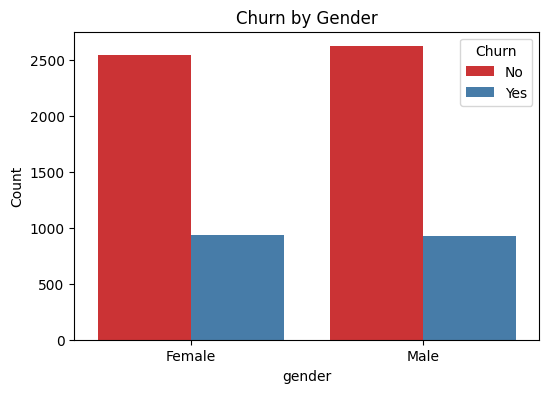

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Gender')
plt.ylabel('Count')
plt.show()


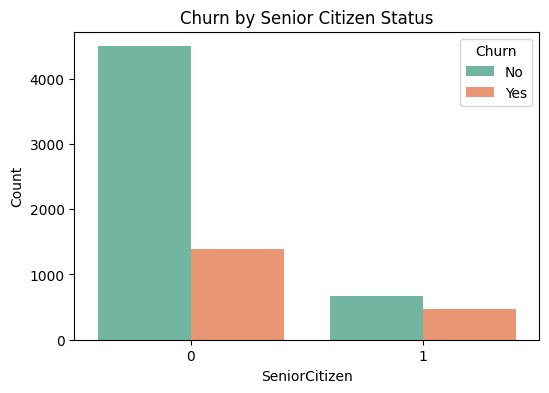

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Senior Citizen Status')
plt.ylabel('Count')
plt.show()


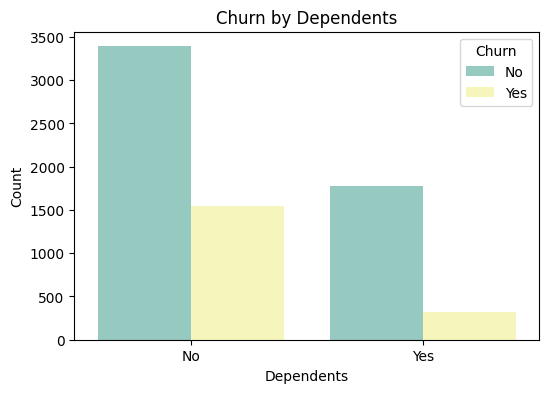

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='Dependents', hue='Churn', data=df, palette='Set3')
plt.title('Churn by Dependents')
plt.ylabel('Count')
plt.show()


# Summary: Demographics vs. Churn
 1. Gender
Observation: Churn rates are nearly identical for both males and females.

Conclusion: Gender is not a significant factor in churn. Business teams shouldn’t focus gender-based campaigns.

 2. SeniorCitizen
Observation: While there are fewer senior citizens (SeniorCitizen = 1), their churn rate is very high (nearly 90%).

Conclusion: Older customers are much more likely to leave.

Business Insight: Special retention plans or better support for senior customers may help reduce churn.

 3. Dependents
Observation: Customers with no dependents churn more, and they make up a larger portion of the customer base.

Conclusion: Single/lone users may be less loyal or price-sensitive.

Business Insight: Consider offering bundled family plans or discounts for individual users.

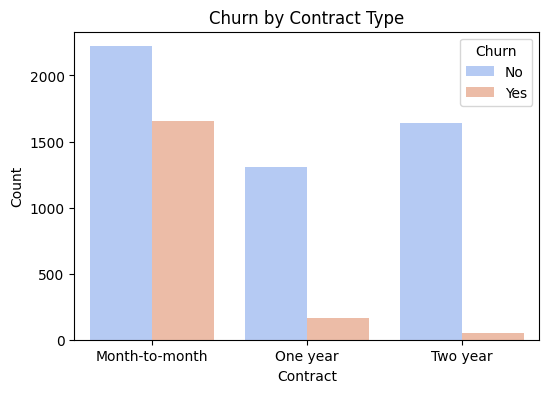

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn by Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


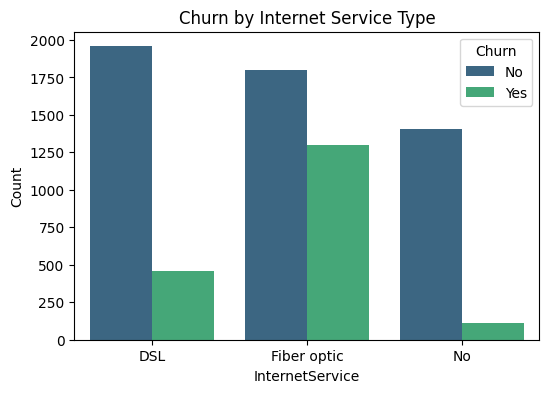

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='viridis')
plt.title('Churn by Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


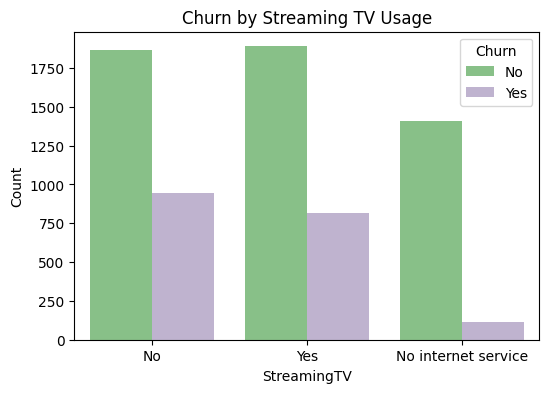

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='StreamingTV', hue='Churn', data=df, palette='Accent')
plt.title('Churn by Streaming TV Usage')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


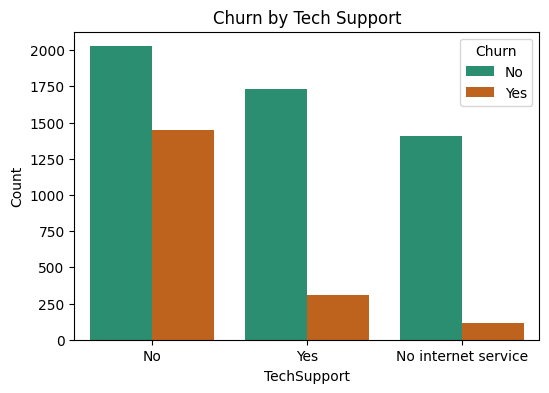

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport', hue='Churn', data=df, palette='Dark2')
plt.title('Churn by Tech Support')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Summary: Service & Contract Insights
 1. Contract Type
Observation:

Month-to-month contracts show the highest churn.

1-year contracts have lower churn.

2-year contracts have the lowest churn.

Insight:
Customers with short-term contracts are more likely to leave.

✅ Business Strategy:

Promote longer-term contracts with loyalty perks or discounts to reduce churn.

 2. Internet Service
Observation:

Customers with no internet service rarely churn.

Fiber optic users churn the most.

Insight:
Fiber optic users may have higher expectations or pricing sensitivity.

✅ Business Strategy:

Investigate service quality or pricing for fiber customers. Offer loyalty rewards or better support.

 3. Streaming TV
Observation:
Churn is slightly higher for customers not using streaming TV.

Insight:
These customers may be more tech-savvy and competitive-service-aware.

✅ Business Strategy:

Improve bundled streaming offers, or run retention campaigns for this segment.

 4. Tech Support
Observation:

Customers without tech support churn more.

Those with tech support or no internet churn much less.

Insight:
Tech support reduces churn — likely due to improved experience.

✅ Business Strategy:

Offer free or trial tech support to reduce churn in early tenure.

# Financial & Tenure-Based Insights

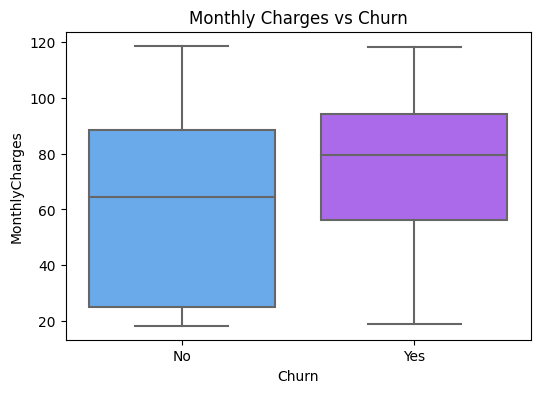

In [40]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='cool')
plt.title('Monthly Charges vs Churn')
plt.show()


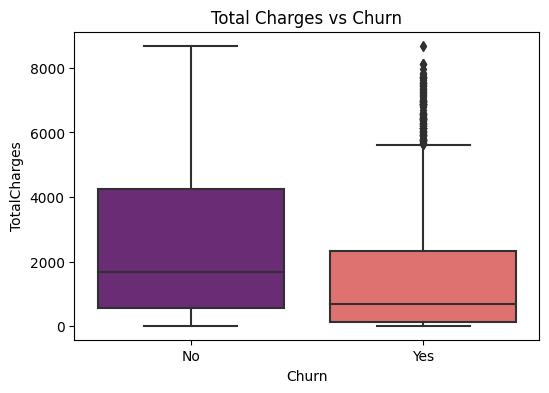

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='magma')
plt.title('Total Charges vs Churn')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

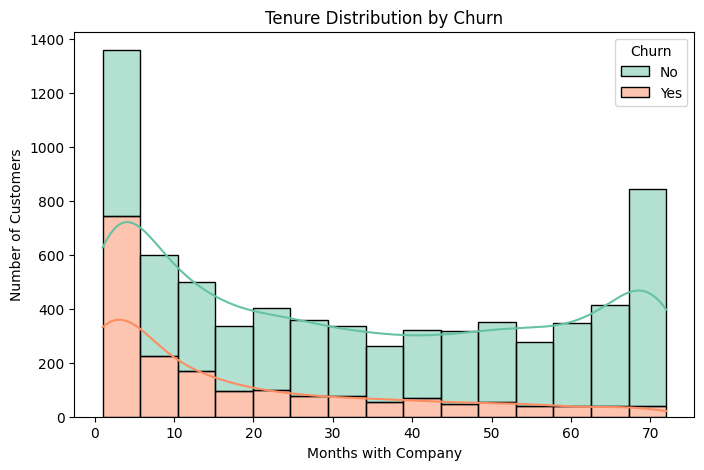

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack', palette='Set2')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Months with Company')
plt.ylabel('Number of Customers')
plt.show()


1. Monthly Charges vs Churn
Observation: Churned customers generally have higher monthly charges.

Insight: They may feel less value for money or be more price-sensitive.

✅ Business Strategy:

Consider offering discounted monthly bundles, usage-based pricing, or value-add services to high-paying customers.

2. Total Charges vs Churn
Observation:

Churned customers have lower median total charges.

Many outliers (high spenders) still churn — possible VIP churn risk.

Insight: These are likely newer customers or short-lived high spenders.

✅ Business Strategy:

Implement early lifecycle retention programs, and investigate high-spending outliers to avoid losing key accounts.

3. Tenure vs Churn
Observation:

Most churn occurs within the first 10 months.

After ~30 months, churn stabilizes.

Insight: The early lifecycle (0–10 months) is the highest-risk period.

✅ Business Strategy:

Focus on onboarding experience, proactive support, and early engagement campaign

# Feature Engineering & Data Preparation

In [43]:
df['Churn'] = df['Churn'].str.strip().str.lower()
df['Churn'] = df['Churn'].map({'yes': 1, 'no': 0})

print("Unique Churn values:", df['Churn'].unique())
print("Value counts:\n", df['Churn'].value_counts())


Unique Churn values: [0 1]
Value counts:
 Churn
0    5163
1    1869
Name: count, dtype: int64


In [44]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [45]:
df.drop('customerID', axis=1, inplace=True)

In [46]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded.shape, df_encoded.columns[:5]


((7032, 31),
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object'))

In [48]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("X_train:", X_train.shape)
print("Churn rate:\n", y_train.value_counts(normalize=True))


X_train: (5625, 30)
Churn rate:
 Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8002842928216063
Precision: 0.6396396396396397
Recall: 0.56951871657754
F1 Score: 0.6025459688826025

Confusion Matrix:
 [[913 120]
 [161 213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.7896233120113717
Precision: 0.6258064516129033
Recall: 0.5187165775401069
F1 Score: 0.5672514619883041

Confusion Matrix:
 [[917 116]
 [180 194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [51]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.7668798862828714
Precision: 0.5676470588235294
Recall: 0.516042780748663
F1 Score: 0.5406162464985994

Confusion Matrix:
 [[886 147]
 [181 193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # required for SVM
    ('svm', SVC(kernel='rbf', C=1, probability=True, random_state=42))
])

svm_pipeline.fit(X_train, y_train)

y_pred_svm = svm_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Accuracy: 0.7867803837953091
Precision: 0.6258503401360545
Recall: 0.4919786096256685
F1 Score: 0.5508982035928145

Confusion Matrix:
 [[923 110]
 [190 184]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Accuracy: 0.6439232409381663
Precision: 0.4178525226390686
Recall: 0.8636363636363636
F1 Score: 0.5632083696599827

Confusion Matrix:
 [[583 450]
 [ 51 323]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.56      0.70      1033
           1       0.42      0.86      0.56       374

    accuracy                           0.64      1407
   macro avg       0.67      0.71      0.63      1407
weighted avg       0.79      0.64      0.66      1407



In [54]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

cat_model = CatBoostClassifier(verbose=0, random_state=42)

cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Precision:", precision_score(y_test, y_pred_cat))
print("Recall:", recall_score(y_test, y_pred_cat))
print("F1 Score:", f1_score(y_test, y_pred_cat))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat))


Accuracy: 0.7775408670931059
Precision: 0.5962145110410094
Recall: 0.5053475935828877
F1 Score: 0.5470332850940666

Confusion Matrix:
 [[905 128]
 [185 189]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



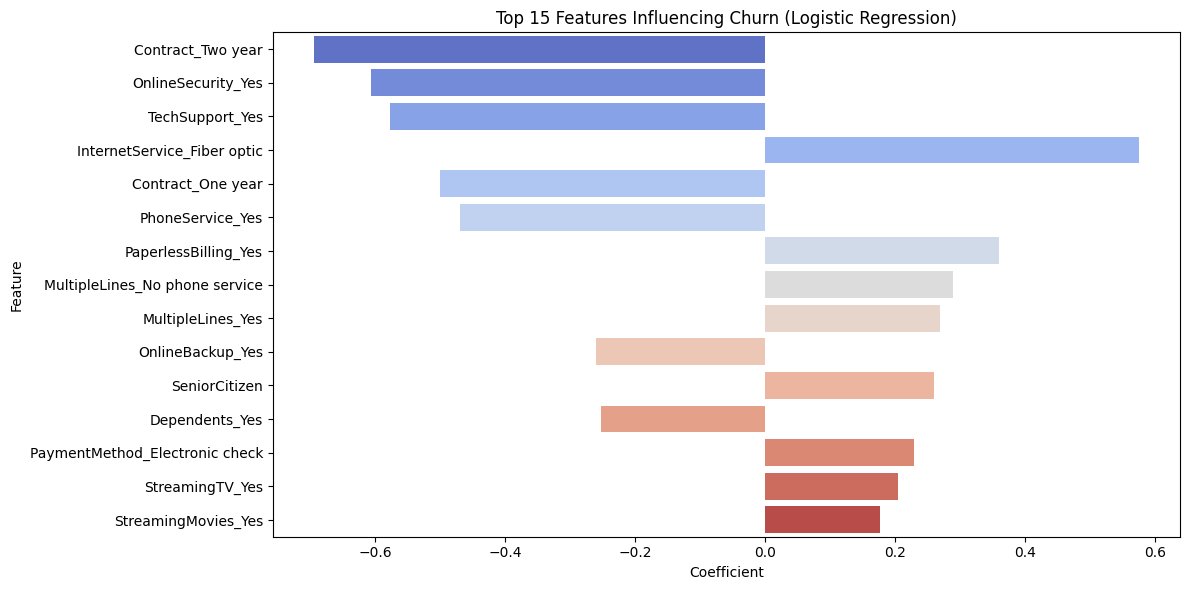

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0]
})

coefficients['abs_coef'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='abs_coef', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(15), palette='coolwarm')
plt.title("Top 15 Features Influencing Churn (Logistic Regression)")
plt.tight_layout()
plt.show()


In [57]:
import pickle

with open("log_model.pkl", "wb") as file:
    pickle.dump(lr, file)
